In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. LINEAR REGRESSION ON TIME SERIES DATA

In [84]:
df = pd.read_csv('time_series.csv')
df.head()

,date,X1,X2,X3,X4,X5,X6,Y
0,2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
1,2016-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001
2,2016-07-01 02:00:00,5.157,1.741,1.279,0.355,3.777,1.218,27.787001
3,2016-07-01 03:00:00,5.090,1.942,1.279,0.391,3.807,1.279,25.044001
4,2016-07-01 04:00:00,5.358,1.942,1.492,0.462,3.868,1.279,21.948000


In [85]:
sample_df = df.head(300)

C:\Users\tegbe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tegbe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tegbe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tegbe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

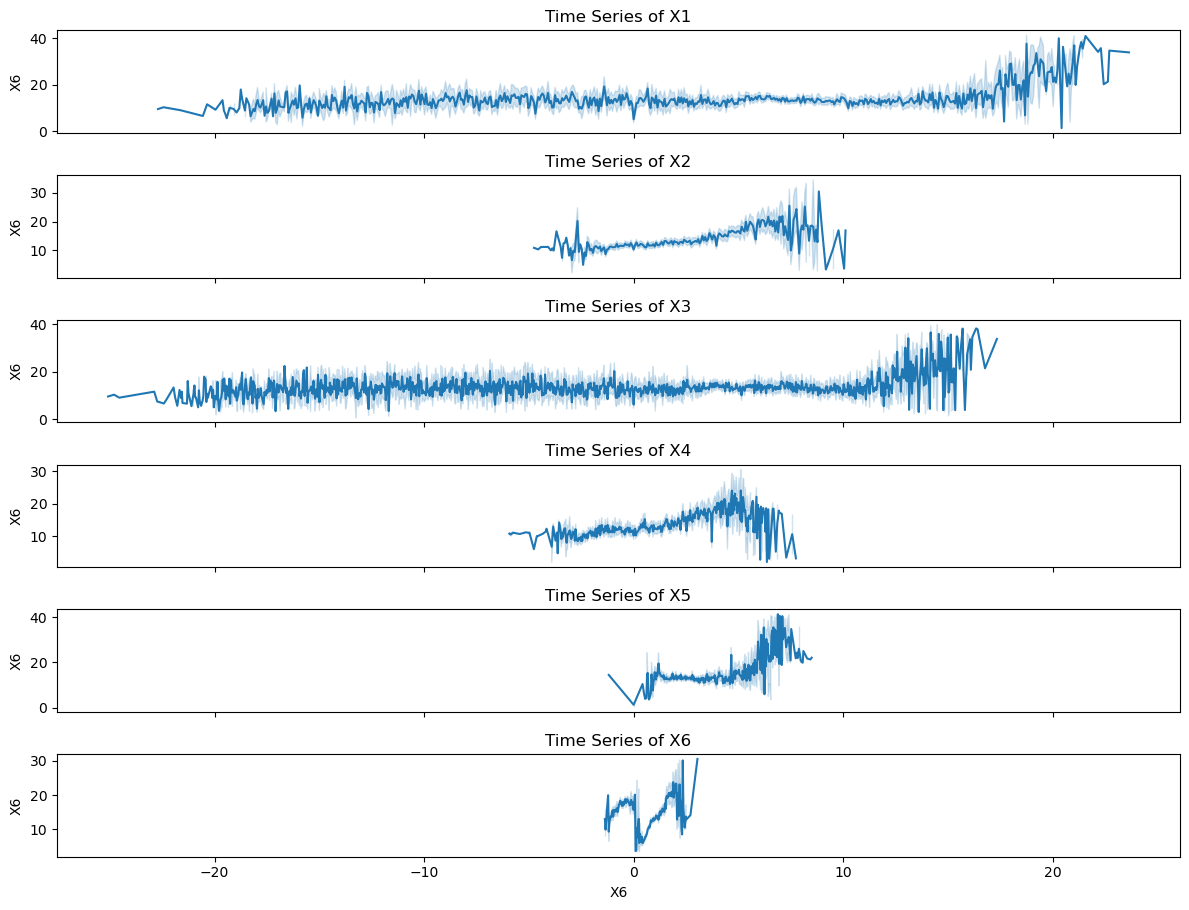

In [86]:
fig, axes = plt.subplots(6, 1, figsize=(12, 10), sharex=True)

# Loop to plot each variable
lst = ['X1', 'X2', 'X3', 'X4', 'X5','X6']
for i in range(0,6):
    sns.lineplot(x=lst[i], y='Y', data=df, ax=axes[i])
    axes[i].set_title(f'Time Series of {lst[i]}')
    axes[i].set_ylabel(var)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

#### Exploring the Correlation

In [87]:
corr_df = df.drop('date',axis=1)
corr_df.corr()

,X1,X2,X3,X4,X5,X6,Y
X1,1.000000,0.114672,0.987355,0.066002,0.291418,0.023606,0.059916
X2,0.114672,1.000000,0.068817,0.930491,0.259487,0.377641,0.224354
X3,0.987355,0.068817,1.000000,0.046266,0.177491,-0.046519,0.050854
X4,0.066002,0.930491,0.046266,1.000000,0.128607,0.069419,0.220004
X5,0.291418,0.259487,0.177491,0.128607,1.000000,0.334563,0.118836
X6,0.023606,0.377641,-0.046519,0.069419,0.334563,1.000000,0.067455
Y,0.059916,0.224354,0.050854,0.220004,0.118836,0.067455,1.000000


#### Columns X1 and X3 look to be very closely correlated

<Axes: >

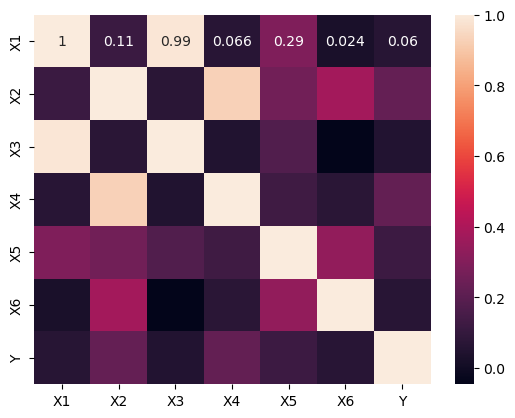

In [88]:
sns.heatmap(corr_df.corr(),annot=True)

#### Plotting the Kernel Density 

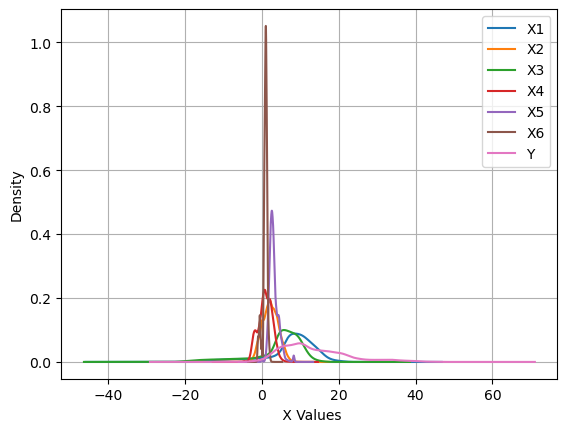

In [89]:
df.plot(kind='kde')
plt.xlabel(" X Values")
plt.ylabel("Density")
plt.grid(True)
plt.show()

#### b.) Train/Test Split

In [90]:
df

,date,X1,X2,X3,X4,X5,X6,Y
0,2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
1,2016-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001
2,2016-07-01 02:00:00,5.157,1.741,1.279,0.355,3.777,1.218,27.787001
3,2016-07-01 03:00:00,5.090,1.942,1.279,0.391,3.807,1.279,25.044001
4,2016-07-01 04:00:00,5.358,1.942,1.492,0.462,3.868,1.279,21.948000
...,...,...,...,...,...,...,...,...
17415,2018-06-26 15:00:00,-1.674,3.550,-5.615,2.132,3.472,1.523,10.904000
17416,2018-06-26 16:00:00,-5.492,4.287,-9.132,2.274,3.533,1.675,11.044000
17417,2018-06-26 17:00:00,2.813,3.818,-0.817,2.097,3.716,1.523,10.271000
17418,2018-06-26 18:00:00,9.243,3.818,5.472,2.097,3.655,1.432,9.778000


In [91]:
train = df.loc[df['date'] <= '2017-06-26 23:00:00']
val = df.loc[(df['date'] > '2017-06-26 23:00:00') & (df['date'] <= '2017-10-24 23:00')]
test = df.loc[(df['date'] > '2017-10-24 23:00') & (df['date'] <= '2018-02-21 23:00')]

print("Training set size:", len(train))
print("Validation set size:", len(val))
print("Test set size:", len(test))


Training set size: 8664
Validation set size: 2879
Test set size: 2880


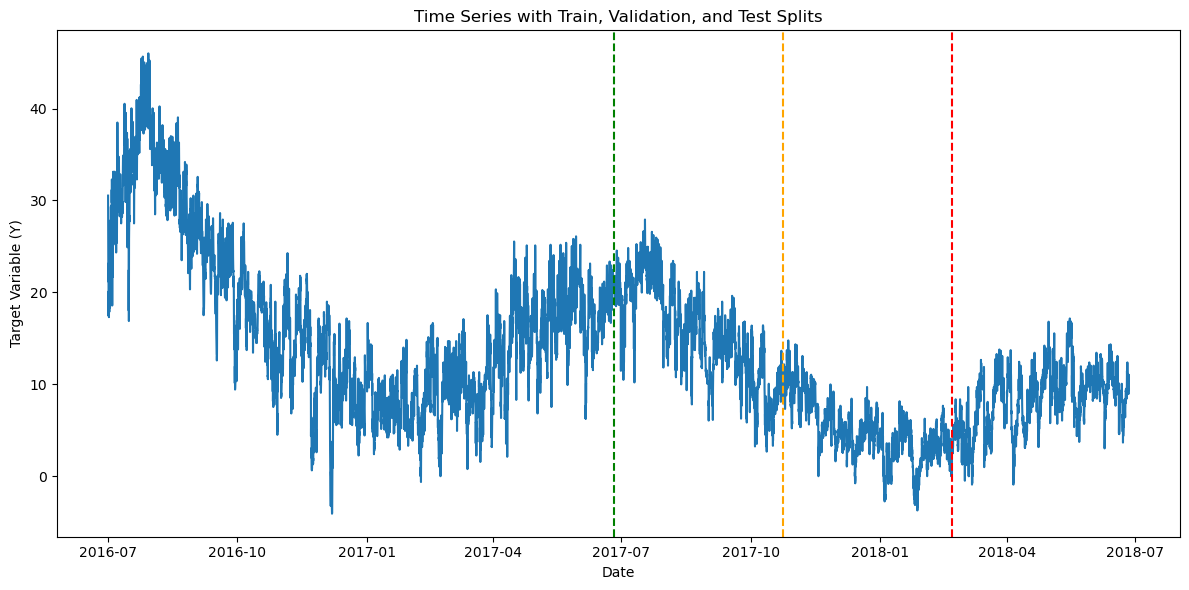

In [92]:
df['date'] = pd.to_datetime(df['date'])

train_end_date = '2017-06-26'
val_end_date = '2017-10-24'
test_end_date = '2018-02-21'

plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['Y'], label='Target Variable (Y)')

plt.axvline(pd.to_datetime(train_end_date), color='green', linestyle='--', label='Train End')
plt.axvline(pd.to_datetime(val_end_date), color='orange', linestyle='--', label='Validation End')
plt.axvline(pd.to_datetime(test_end_date), color='red', linestyle='--', label='Test End')

plt.title("Time Series with Train, Validation, and Test Splits")
plt.xlabel("Date")
plt.ylabel("Target Variable (Y)")

plt.tight_layout()
plt.show()

### c. Scaling

In [93]:
def scale_variables(data, metrics):
    scaled_data = data.copy()
        
    for variable in metrics:
        mean = train[variable].mean()
        std = train[variable].std()
        scaled_data[variable] = (data[variable] - mean) / std
      
    return scaled_data
    
variables = ['X1','X2','X3','X4','X5','X6']

scaled_train = scale_variables(train,variables)
scaled_val = scale_variables(val,variables)
scaled_test = scale_variables(test,variables)

In [ ]:
# Standard Scaling 

class StandardScalerScratch:
    def __init__(self):
        self.mean = None  # Store column-wise mean
        self.std = None   # Store column-wise standard deviation

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0, ddof=1)  # ddof=1 for sample standard deviation

    def transform(self, X):
        return (X - self.mean) / self.std

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

np.random.seed(42)
data = pd.DataFrame({
    "Feature1": np.random.rand(100) * 100,
    "Feature2": np.random.rand(100) * 50 + 10,
    "Feature3": np.random.rand(100) * 200 - 100
})


scaler = StandardScalerScratch()
scaled_data = scaler.fit_transform(data)

scaled_df = pd.DataFrame(scaled_data, columns=data.columns)

tools.display_dataframe_to_user(name="Standard Scaled Data", dataframe=scaled_df)



# Min-Max Normalization Implementation from Scratch
class MinMaxScalerScratch:
    def __init__(self):
        self.min = None  # Store column-wise min
        self.max = None  # Store column-wise max

    def fit(self, X):
        self.min = np.min(X, axis=0)
        self.max = np.max(X, axis=0)

    def transform(self, X):
        return (X - self.min) / (self.max - self.min)

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

# Apply Min-Max Normalization
normalizer = MinMaxScalerScratch()
normalized_data = normalizer.fit_transform(data)

normalized_df = pd.DataFrame(normalized_data, columns=data.columns)

#### d. LSE

Regression: Implement linear regression using the Least Squares Estimate (LSE) method. You
are required to:
a) Implement matrix multiplication and inversion using numpy.
b) Compute the estimated parameters using the LSE method

In [131]:
X = scaled_train[['X1', 'X2', 'X3', 'X4', 'X5']]
Y = scaled_train['Y']

X = np.array(X)
Y1 = np.array(Y)

X_b = np.c_[np.ones(X.shape[0]), X] ### This will add an intercept column

In [133]:
beta_hat = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y1)
print("The estimated Parameters for Train are :", beta_hat)

Y_pred1 = X_b.dot(beta_hat)
print("Predictions for Train are :", Y_pred1)

# Calculate Mean Squared Error
mse = np.mean((Y1 - Y_pred1) ** 2)
mae = np.mean(np.abs(Y1 - Y_pred1))
print("Mean Squared Error and Mean Absolute Error for Train are :", mse,mae)

The estimated Parameters for Train are : [17.13662789 -1.91639749  5.26124611  1.78251227 -0.13756652  2.01455169]
Predictions for Train are : [19.49669908 19.55754778 18.1072748  ... 14.8454925  16.28669993
 17.33686072]
Mean Squared Error and Mean Absolute Error for Train are : 50.894201122160645 5.476539015669759


### Now applying to Validation and Test Dataset

In [134]:
X = scaled_val[['X1', 'X2', 'X3', 'X4', 'X5']]
Y = scaled_val['Y']

X = np.array(X)
Y2 = np.array(Y)
X_b = np.c_[np.ones(X.shape[0]), X]

beta_hat = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y2)
print("The estimated Parameters for Validation are :", beta_hat)

Y_pred2 = X_b.dot(beta_hat)
print("Predictions for Validation:", Y_pred2)

# Calculate Mean Squared Error
mse = np.mean((Y2 - Y_pred2) ** 2)
mae = np.mean(np.abs(Y - Y_pred2))
print("Mean Squared Error and Mean Absolute Error for Validation:", mse,mae)

The estimated Parameters for Validation are : [13.81194261  7.68653594 -3.10614367 -7.71847754  2.83733242  1.98827336]
Predictions for Validation: [14.97764    14.20710219 14.49630545 ... 15.54576055 12.2865472
 13.02299611]
Mean Squared Error and Mean Absolute Error for Validation: 11.195550354114475 2.7126178489513086


In [135]:
X = scaled_test[['X1', 'X2', 'X3', 'X4', 'X5']]
Y = scaled_test['Y']

X = np.array(X)
Y3 = np.array(Y)
X_b = np.c_[np.ones(X.shape[0]), X]

beta_hat = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y3)
print("The estimated Parameters for Test are :", beta_hat)

Y_pred3 = X_b.dot(beta_hat)
print("Predictions for Test:", Y_pred3)

# Calculate Mean Squared Error
mse = np.mean((Y3 - Y_pred3) ** 2)
mae = np.mean(np.abs(Y - Y_pred3))
print("Mean Squared Error and Mean Absolute Error for Test:", mse,mae)

The estimated Parameters for Test are : [ 5.3615342  -4.56222556  3.66057755  3.88489226 -4.12782807 -0.67826609]
Predictions for Test: [5.86041621 4.66510387 6.64783407 ... 1.88372612 1.9110887  2.60269018]
Mean Squared Error and Mean Absolute Error for Test: 7.285752203254583 2.1457949999478316


C:\Users\tegbe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tegbe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='X6', ylabel='Y'>

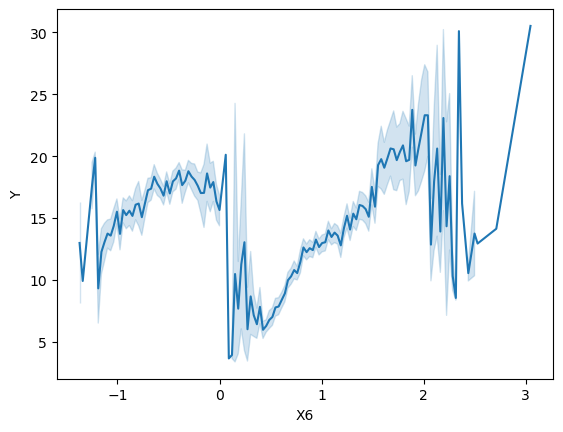

In [142]:
sns.lineplot(x=lst[i], y='Y', data=df)
#plt.scatter(X, exponential_func(X, *popt), label='Fitted Curve', color='red')

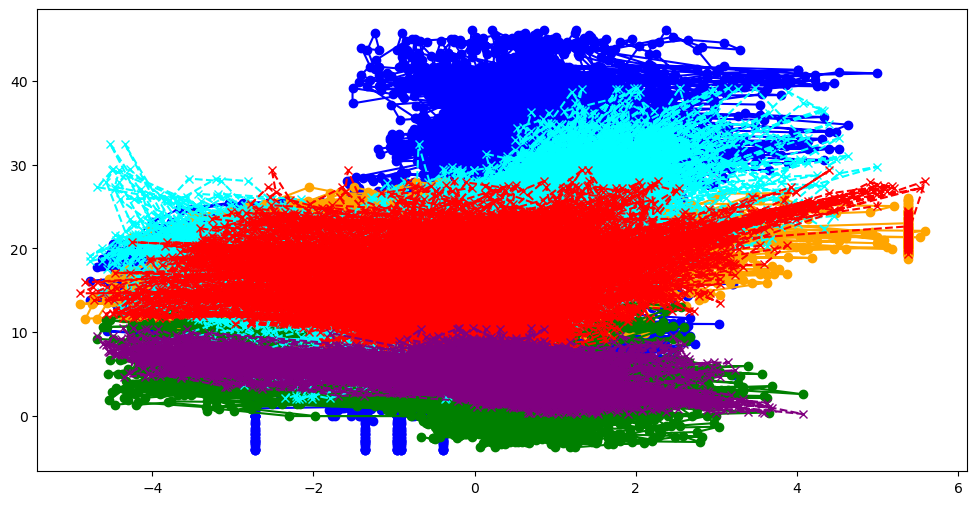

In [140]:
X_train = scaled_train[['X1', 'X2', 'X3', 'X4', 'X5']]
X_val = scaled_val[['X1', 'X2', 'X3', 'X4', 'X5']]
X_test = scaled_test[['X1', 'X2', 'X3', 'X4', 'X5']]


Y_train = scaled_train['Y']
Y_val = scaled_val['Y']
Y_test = scaled_test['Y']

Y_pred1
Y_pred2
Y_pred2

plt.figure(figsize=(12, 6))

# Plot true values
plt.plot(X_train, Y_train, marker='o', label='Train True', color='blue')
plt.plot(X_val, Y_val, marker='o', label='Validation True', color='orange')
plt.plot(X_test, Y_test, marker='o', label='Test True', color='green')

# Plot predicted values
plt.plot(X_train, Y_pred1, marker='x', linestyle='--', label='Train Predicted', color='cyan')
plt.plot(X_val, Y_pred2, marker='x', linestyle='--', label='Validation Predicted', color='red')
plt.plot(X_test, Y_pred3, marker='x', linestyle='--', label='Test Predicted', color='purple')



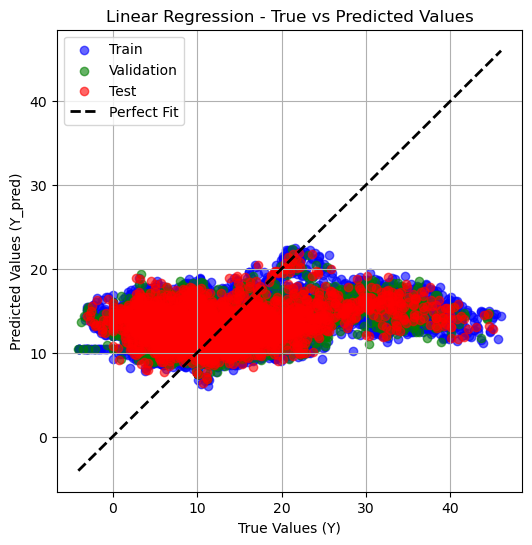

In [20]:
data = pd.read_csv('time_series.csv')
df.head()

data["date"] = pd.to_datetime(data["date"])
data = data.drop(columns=["date"])  # Remove date column

X = data.drop(columns=["Y"]).values  # Features
y = data["Y"].values  # Target

from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Implement Least Squares Estimate (LSE) for Linear Regression
class LinearRegressionLSE:
    def __init__(self):
        self.coefficients = None

    def fit(self, X, y):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term
        self.coefficients = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term
        return X_b.dot(self.coefficients)

    def mse(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    def rmse(self, y_true, y_pred):
        return np.sqrt(self.mse(y_true, y_pred))

# Train the model
model = LinearRegressionLSE()
model.fit(X_train, y_train)

# Predict on train, validation, and test sets
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# Compute loss metrics
train_mse = model.mse(y_train, y_train_pred)
val_mse = model.mse(y_val, y_val_pred)
test_mse = model.mse(y_test, y_test_pred)

train_rmse = model.rmse(y_train, y_train_pred)
val_rmse = model.rmse(y_val, y_val_pred)
test_rmse = model.rmse(y_test, y_test_pred)

# Display results
loss_df = pd.DataFrame({
    "Dataset": ["Train", "Validation", "Test"],
    "MSE": [train_mse, val_mse, test_mse],
    "RMSE": [train_rmse, val_rmse, test_rmse]
})
loss_df


import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))

plt.scatter(y_train, y_train_pred, color='blue', alpha=0.6, label="Train")
plt.scatter(y_val, y_val_pred, color='green', alpha=0.6, label="Validation")
plt.scatter(y_test, y_test_pred, color='red', alpha=0.6, label="Test")

# Perfect fit line
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='black', linestyle='--', linewidth=2, label="Perfect Fit")

plt.xlabel("True Values (Y)")
plt.ylabel("Predicted Values (Y_pred)")
plt.title("Linear Regression - True vs Predicted Values")
plt.legend()
plt.grid(True)

plt.show()


## 2. VISUALIZING LSE ON A TOY DATASET

Linear Regression using Least Squares: Implement the linear regression model using the Least
Squares Estimation (LSE) method. Given a matrix of input features X and a vector of target values y,
compute the parameters βˆ using numpy (pure Python). You should not use any built-in functions for linear
regression. Instead, derive the result based on the least squares criterion.

In [26]:
df1 = pd.read_csv('toy_data.csv')
df1.head()

,X1,X2,Y
0,5.530492,8.136530,53.470131
1,5.111720,0.846906,15.925409
2,9.011047,6.510469,54.649639
3,7.806497,0.349096,24.003095
4,2.047190,1.057417,14.739897


In [27]:
X = df1[['X1', 'X2']]
Y = df1['Y']

X = np.array(X)
Y = np.array(Y)

X_b = np.c_[np.ones(X.shape[0]), X] ### This will add an intercept column

beta_hat = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)
print("The estimated Parameters for Test are :", beta_hat)


The estimated Parameters for Test are : [3.66345247 1.96836519 4.93212246]


In [28]:
Y_pred = X_b.dot(beta_hat)

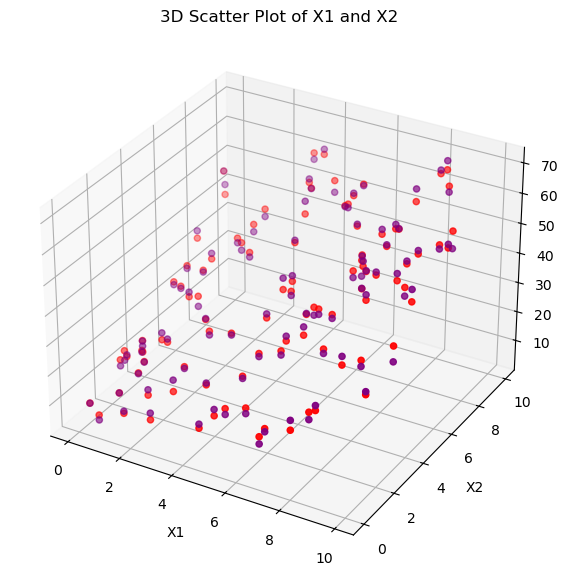

In [30]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(df1['X1'], df1['X2'], df1['Y'], color='purple')
ax.scatter(df1['X1'], df1['X2'],Y_pred , color='red')

# Plot regression plane
#ax.plot_surface(x1_grid, x2_grid, y_pred_grid, color='orange', alpha=0.5)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.set_title('3D Scatter Plot of X1 and X2')

plt.show()


## Computing sum of all the subjects for each students

By accessing each value in dataframe and putting it in the for loop to find the sum on after another.The loop goes on till the maximum number of students is reached.

In [ ]:
num_students=len(df)
sum=[]
for i in range (0,num_students):
    sum.append(df['English'][i]+df['Math'][i]+df['Science'][i]+df['German'][i]+df['Sports'][i])
print(np.round(sum))

avg=[]
for i in range (0,num_students):
    avg.append(sum[i]/500)
print(np.round(avg,2))

stdev=[]
for i in range (0,num_students):
    points=[df['English'][i],df['Math'][i],df['Science'][i],df['German'][i],df['Sports'][i]]
    stdev.append(np.std(points))
print(np.round(stdev,2))


In [ ]:
#creating instances for dataframe
gradsys = [ ('96-100','A+',0) ,
             ('90-95','A',0) ,
             ('86-89','A-',0),
             ('80-85','B+',0),
             ('76-79','B',0) ,
             ('70-75','B-',0),('66-69','C+',0),('60-65','C',0),('56-59','D',0),('0-55','F',0) ]

#creating dataframe columns with and also exporting the values in to it.
grad = pd.DataFrame(gradsys , columns = ['%range' , 'Grade', '#of students'])

for i in range (0,num_students):
    num=avg[i]*100
    if num<=100 and num>=96:
        grad['#of students'][0]+=1
    elif num<95 and num>90:
        grad['#of students'][1]+=1
    elif num < 89 and num > 86:
        grad['#of students'][2]+=1
    elif num < 85 and num > 80:
        grad['#of students'][3]+=1
    elif num < 79 and num > 76:
        grad['#of students'][4]+=1
    elif num <75 and num >70:
        grad['#of students'][5]+=1
    elif num <69 and num >66:
        grad['#of students'][6]+=1
    elif num <65 and num >60:
        grad['#of students'][7]+=1
    elif num <59 and num >56:
        grad['#of students'][8]+=1
    elif num <55 and num >0:
        grad['#of students'][9]+=1
  
print(grad)


In [ ]:
##multiple linear regression

In [5]:
import numpy as np
import pandas as pd

class MultipleLinearRegression:
    def __init__(self):
        self.coefficients = None  # Stores the model coefficients (theta)
        self.intercept = None  # Stores the intercept

    def fit(self, X, y):
        """
        Train the model using the normal equation method: θ = (X^T * X)^(-1) * X^T * y
        """
        # Add bias term (column of ones) for the intercept
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  
        
        # Compute optimal theta using the normal equation
        theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
        
        # Store intercept and coefficients
        self.intercept = theta_best[0]
        self.coefficients = theta_best[1:]

    def predict(self, X):
        """
        Predict using the trained model: y = X * θ + intercept
        """
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term
        return X_b.dot(np.r_[self.intercept, self.coefficients])

    def score(self, X, y):
        """
        Compute R-squared score to evaluate the model.
        """
        y_pred = self.predict(X)
        ss_total = np.sum((y - np.mean(y)) ** 2)
        ss_residual = np.sum((y - y_pred) ** 2)
        return 1 - (ss_residual / ss_total)

# Generate synthetic data for testing
np.random.seed(42)
X = np.random.rand(100, 2) * 10  # 100 samples, 2 features
true_coeffs = np.array([3, 5])  # True coefficients
y = X.dot(true_coeffs) + 7 + np.random.randn(100) * 2  # y = 3*x1 + 5*x2 + 7 + noise

# Train the model
model = MultipleLinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Model accuracy
r2_score = model.score(X, y)

# Display results
results_df = pd.DataFrame({
    "Statistic": ["Intercept", "Coefficient 1", "Coefficient 2", "R-squared"],
    "Value": [model.intercept, model.coefficients[0], model.coefficients[1], r2_score]
})

results_df

,Statistic,Value
0,Intercept,6.544545
1,Coefficient 1,3.067733
2,Coefficient 2,5.070989
3,R-squared,0.986375


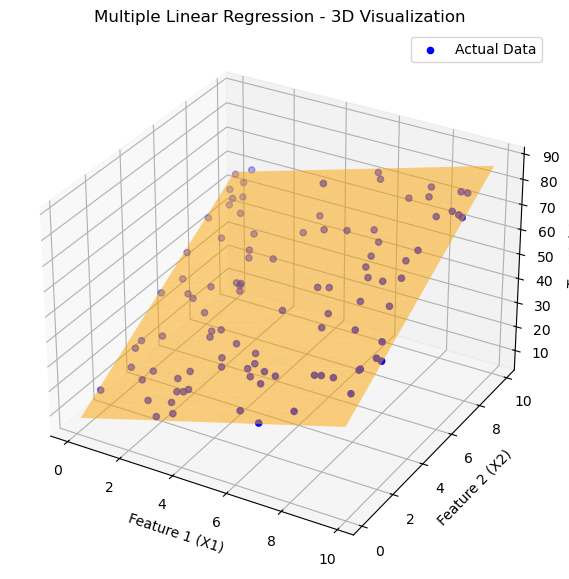

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create 3D plot for visualization
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of actual data points
ax.scatter(X[:, 0], X[:, 1], y, color='blue', label="Actual Data")

# Generate grid for prediction
x1_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 20)
x2_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 20)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
y_pred_grid = model.intercept + model.coefficients[0] * x1_grid + model.coefficients[1] * x2_grid

# Plot regression plane
ax.plot_surface(x1_grid, x2_grid, y_pred_grid, color='orange', alpha=0.5)

# Labels and title
ax.set_xlabel("Feature 1 (X1)")
ax.set_ylabel("Feature 2 (X2)")
ax.set_zlabel("Target (y)")
ax.set_title("Multiple Linear Regression - 3D Visualization")

plt.legend()
plt.show()


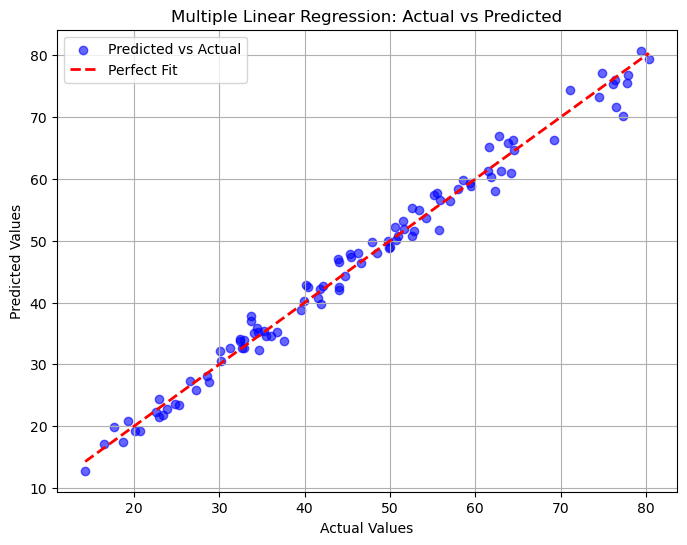

In [7]:
# Plot actual vs predicted values

plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, color='blue', alpha=0.6, label="Predicted vs Actual")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', linewidth=2, label="Perfect Fit")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Multiple Linear Regression: Actual vs Predicted")
plt.legend()
plt.grid(True)

plt.show()


**Regression**

Implement learn a linear regression model using Normal Equations using the algorithm below.

$\textbf{learn-linreg-NormEq}$ ($D\_train:=\{ (x_1,y_1), \ldots, (x_N,y_N) \}$):<br>
    $X:= (x_1, x_2, \ldots, x_N)^T$ <br>
    $y:= (y_1, y_2, \ldots, y_N)^T$ <br>
    $A:= X^T X$ <br>
    $b:= X^T y$ <br>
    $\hat\beta:= \text{solve-SLE}(A, b)$ <br>
    return $\hat\beta$ <br>

For solving the Linear Equations (the function $\text{solve-SLE}$), implement either: 
-   Gaussian Elimination (implemented in pure python i.e., only NumPy).
-   QR decomposition (implemented in pure python i.e., only NumPy)

**(Note: you are not allowed to use numpy.linalg.qr or np.linalg.lstsq for this)**

We will apply this function on dummy data to verify correctness of the code, your function should provide beta's close to the original ones. 

$\beta$ = (7.10844396, 6.30577555, 4.26871516, 6.97082463, 1.65779631, 9.14148068, 5.45284651, 4.40990826, 7.87749723, 6.9317578)

In [31]:
Beta = np.array([7.10844396, 6.30577555, 4.26871516, 6.97082463, 1.65779631,
       9.14148068, 5.45284651, 4.40990826, 7.87749723, 6.9317578 ])

## Setting the seed for ensuring deterministic behaviour
np.random.seed(1408)

X = np.random.normal(loc=2,scale=1,size=(100,10))*np.random.normal(loc=4,scale=0.1,size=(1,10)) + np.random.normal(loc=5,scale=2,size=(100,10))*np.random.normal(loc=1,scale=2,size=(1,10))

Y = X@Beta + np.random.normal(loc=1,scale=1,size=(100))

### Write your code 
def learn_linreg_NormEq(X, Y, method='Gaussian'):
    
    ## To calculate A and b
    A = np.matmul(X.T,X)
    b = np.matmul(X.T,Y)
    
    solver = LinearSystemSolver(A, b)
    beta = solver.solve_SLE(method)
    return beta

In [32]:
class LinearSystemSolver:
    def __init__(self, A, b):
        self.A = A.copy()
        self.b = b.copy()

    def solve_SLE(self, solver="Gaussian"):
        if solver == 'Gaussian':
            self.A, self.b = self.Gaussian_elimination(self.A, self.b)
            x = self.back_substition(self.A, self.b)
        elif solver == 'QR':
            self.A, self.b = self.QR_decomposition(self.A, self.b)
            x = self.back_substition(self.A, self.b)
        elif solver == 'Gauss Jordan':
            x = self.Gauss_Jordan(self.A, self.b)
        else:
            raise Exception('Please enter correct method name as Gaussian or QR')

        return x

    def Gaussian_elimination(self, A, b):
        for k in range(len(b)-1):
            if A[k, k] == 0:
                raise Exception('Math Error')
            for i in range(k+1, len(b)):
                factor = A[i, k] / A[k, k]
                for j in range(k, len(b)):
                    A[i, j] -= factor * A[k, j]
                b[i] -= factor * b[k]
        return A, b

    def QR_decomposition(self, A, b):
        Q = np.zeros((A.shape[0], A.shape[0]))
        o = np.zeros((A.shape[0], A.shape[0]))
        o[:, 0] = A[:, 0]
        Q[:, 0] = o[:, 0] / np.linalg.norm(o[:, 0])

        for i in range(1, A.shape[0]):
            o[:, i] = A[:, i]
            for j in range(i):
                o[:, i] -= np.dot(A[:, i], Q[:, j]) * Q[:, j]
            Q[:, i] = o[:, i] / np.linalg.norm(o[:, i])

        R = np.zeros((A.shape[0], A.shape[1]))

        for i in range(A.shape[0]):
            for j in range(i, A.shape[1]):
                R[i, j] = np.dot(A[:, j], Q[:, i])

        return R, np.dot(Q.T, b)
    
    def Gauss_Jordan(self, A, b):
        #This directly returns the answer
        x = np.append(A,b.reshape(-1,1),1) #to make augmented matrix
        ## for non-square matrix we are going to take the diag with minimum dimension
        diag = min(x.shape)

        ## forward elimination
        for d in range(diag): #iterate over all diag element
            p_element = x[d,d] #take pivot element
            x[d,:] = x[d,:]/p_element ## divide whole row by pivot
            p_element = x[d,d] #incase pivot gets modified store new
            for s in range(1,diag): #for iterating over other rows
                if d+s>=diag: #to remain in bound
                    break
            ## let's find a factor by which we will multiply the pivot row and add into other rows
                factor = -x[d+s,d]/p_element
            ## broadcast the results
                x[d+s,:] = factor*x[d,:] + x[d+s,:]

        ## backward elimination
        for d in range(diag-1,-1,-1): #iterate over all diag element backward
            for s in range(1,diag):  #for iterating over other rows
                if d-s<0: #to remain in bound
                    break
                if x[d-s,d] == 0: #to avoid errors
                    continue
                factor = -x[d-s,d] #factor by which we will multiply the pivot row and add into other rows
                x[d-s,:] = factor*x[d,:] + x[d-s,:] #broadcast the results
        return x[:,-1]

    def back_substition(self, A, b):
        x = np.zeros(len(b), dtype=float)
        x[len(b)-1] = b[len(b)-1] / A[len(b)-1, len(b)-1]

        for i in range(len(b) - 2, -1, -1):
            total = b[i]
            for j in range(i+1, len(b)):
                total -= A[i, j] * x[j]
            x[i] = total / A[i, i]

        return x
    

In [33]:
# Solve the system using Gaussian elimination
solution_gaussian = learn_linreg_NormEq(X, Y, method='Gaussian')
print("Solution using Gaussian elimination:", solution_gaussian)

# Solve the system using QR decomposition
solution_qr = learn_linreg_NormEq(X, Y, method='QR')
print("Solution using QR decomposition:", solution_qr)

# Solve the system using Gauss Jordan
solution_qr = learn_linreg_NormEq(X, Y, method='Gauss Jordan')
print("Solution using Gauss Jordan elimination:", solution_qr)

Solution using Gaussian elimination: [7.11902953 6.33663098 4.3042112  6.97657093 1.71656095 9.13381132
 5.42917403 4.430442   7.86111635 6.86502871]
Solution using QR decomposition: [7.11902953 6.33663098 4.3042112  6.97657093 1.71656095 9.13381132
 5.42917403 4.430442   7.86111635 6.86502871]
Solution using Gauss Jordan elimination: [7.11902953 6.33663098 4.3042112  6.97657093 1.71656095 9.13381132
 5.42917403 4.430442   7.86111635 6.86502871]


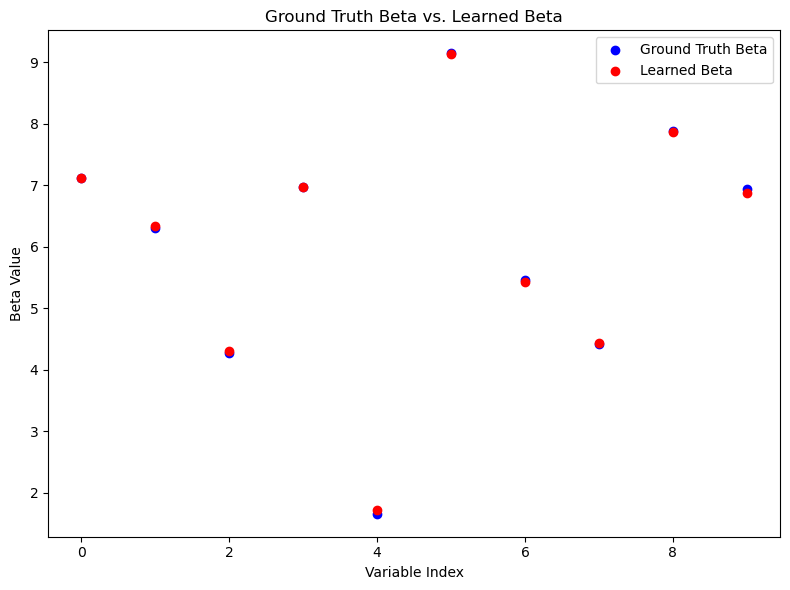

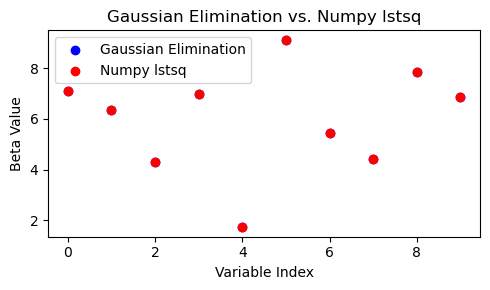

In [35]:
plt.figure(figsize=(8, 6))

plt.scatter(range(len(Beta)), Beta, color='blue', label='Ground Truth Beta')
plt.scatter(range(len(solution_gaussian)), solution_gaussian, color='red', label='Learned Beta')

plt.xlabel('Variable Index')
plt.ylabel('Beta Value')
plt.title('Ground Truth Beta vs. Learned Beta')
plt.legend()

plt.tight_layout()
plt.show()


#Part-2
# Using numpy's linear least squares solver
beta_pred_lstsq = np.linalg.lstsq(X, Y, rcond=None)

# Visual comparison using a scatter plot
plt.figure(figsize=(5, 3))

# Plotting Gauss-Jordan elimination results vs. numpy's lstsq results
plt.scatter(range(len(solution_gaussian)), solution_gaussian, color='blue', label='Gaussian Elimination')
plt.scatter(range(len(beta_pred_lstsq[0])), beta_pred_lstsq[0], color='red', label='Numpy lstsq')

plt.xlabel('Variable Index')
plt.ylabel('Beta Value')
plt.title('Gaussian Elimination vs. Numpy lstsq')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
"""Method for solving system of linear equations using gaussian elimination method"""

temp=np.transpose(x_train)
a=temp.dot(x_train)
b=temp.dot(y_train)
a=a.values
b= np.reshape(b.values, (a.shape[0], 1))


def Gaussian_elimination(A,b):  
    n =  len(A)
    for pivot_row in range(n-1):
        for row in range(pivot_row+1, n):
            multiplier = A[row][pivot_row]/A[pivot_row][pivot_row]
            #the only one in this column since the rest are zero
            A[row][pivot_row] = multiplier
            for col in range(pivot_row + 1, n):
                A[row][col] = A[row][col] - multiplier*A[pivot_row][col]
            #Equation solution column
            b[row] = b[row] - multiplier*b[pivot_row]
    x = np.zeros(n)
    k = n-1
    x[k] = b[k]/A[k,k]
    while k >= 0:
        x[k] = (b[k] - np.dot(A[k,k+1:],x[k+1:]))/A[k,k]
        k = k-1
    return x

betas_gauss_elimination=Gaussian_elimination(a,b)
print(betas_gauss_elimination)


"""Method to learn linear regression using normal equations. Default solver is
gaussian solver"""

def learnLinregNormEq(X, Y, solver = gaussianSolver):
    
    if isinstance(X,np.ndarray) and isinstance(Y,np.ndarray):
        if X.shape[0] != Y.shape[0]:
            raise ValueError("The shape of X and Y is inconsistant")

        X = np.insert(X, 0, 1, axis=1)
        
        Xtranspose = X.T
        XtX = np.dot(Xtranspose,X)
        XtY = np.dot(Xtranspose,Y)
        return solver(XtX, XtY)
        
        
    else:
        raise TypeError("Expected X and Y as numpy.ndarray")

#### Another method is to solve SLE is QR decompostion a QR decomposition, also known as a QR factorization or QU factorization is a decomposition of a matrix A into a product A = QR of an orthogonal matrix Q and an upper triangular matrix R


In [ ]:
def qr(A):
    m, n = A.shape
    Q = np.eye(m)
    for i in range(n - (m == n)):
        H = np.eye(m)
        H[i:, i:] = make_householder(A[i:, i])
        Q = np.dot(Q, H)
        A = np.dot(H, A)
    return Q, A
 
def make_householder(a):
    v = a / (a[0] + np.copysign(np.linalg.norm(a), a[0]))
    v[0] = 1
    H = np.eye(a.shape[0])
    H -= (2 / np.dot(v, v)) * np.dot(v[:, None], v[None, :])
    return H
 
 
q,r = qr(a)

p = np.dot(q.T, b)
betas_qr=np.dot(np.linalg.inv(r), p)
betas_qr=betas_qr.flatten()

print('The betas after qr decompostion is :',betas_qr)
print('q:\n', q.round(6))
print('r:\n', r.round(6))




In [ ]:
sns.set(style="ticks", color_codes=True)

g = sns.pairplot(auto_imports,vars=['symboling','curb-weight','engine-size','city-mpg','highway-mpg'])

TextEncoder
Here the data is mix of numbers and text. Text value cannot be directly used and should be converted to numeric data.
For this I have created a function text encoder which accepts a pandas series. Text encoder returns a lookUp dictionary for recreating the numeric value for text value

In [ ]:
def textEncoder(*textVectors):
    lookUpDictionary = {}
    lookupValue = 1
    for textVector in textVectors:
        for key in textVector.unique():
            if key not in lookUpDictionary:
                lookUpDictionary[key] = lookupValue
                lookupValue +=1
        
    return lookUpDictionary

For selecting some features and for dropping others I am using Pearson's Coefficient. The value of Pearson's coefficient lies between [-1, 1] and tells how two features are related

In [ ]:
"""Generate pearson's coefficient"""

def generatePearsonCoefficient(A, B):
    A = A - A.mean()
    B = B - B.mean()
    return ((A * B).sum())/(sqrt((A * A).sum()) * sqrt((B * B).sum()))

for column in airFareData:
    if column != "price":
        print("The corelation between " + column +" vs price is " + 
              str(generatePearsonCoefficient(airFareData[column], airFareData['price'])))

In [ ]:
def boldDriverStepLengthController(fx, alpha, x, y, beta, gradient, maxIterations = 1000, 
                                   alphaMinus = 0.5, alphaPlus = 1.1):
    alpha = alpha * alphaPlus
    
    for i in range(0, maxIterations):
        
        alpha = alpha * alphaMinus
        residual_alpha_gradient = y - np.dot((beta - (alpha * gradient)), x .T)
        fx_alpha_gradient = np.dot(residual_alpha_gradient.T, residual_alpha_gradient)
        
        """Convergence condition for bold driver method"""
        if fx - fx_alpha_gradient > 0:
            break;
    return alpha

In [ ]:
"""If no step length controller is provided then values of alpha will be taken as step length.
Else the step length controller will be used. Additional parameters to the controller are
provided by stepLengthControllerParameters"""

def linearRegressionGradientDescent(x, y, xTest, yTest, alpha, beta,
                                    maxIterations=1000, epsilon=1.1e-20, 
                                    stepLengthController = None, stepLengthControllerParameters = None):
    x = np.insert(x, 0, 1, axis=1)
    x = x * 1.0
    y = y * 1.0

    if stepLengthController != None:
        print("Warning using stepLengthController alpha values will be rewritten")
            
    plotX = []
    plotY_diff = []
    plotY_RMSE = []
    
    y_prediction = np.dot(beta, x.T)
    residual = y_prediction - y
    f_x = np.dot(residual.T, residual)
    
    rmse = RMSE(yTest, predictionLinearRegression(xTest, beta))
    
    """For plotting graph"""
    plotY_RMSE.append(rmse)
    plotY_diff.append(f_x)
    plotX.append(0)

for i in range(1, maxIterations):

        gradient = np.dot(x.T, residual) * 2
        
        """Use step length controller if required"""
        if stepLengthController != None:
            alpha = stepLengthController(fx = f_x, alpha = alpha, x = x, y = y, 
                                         beta = beta, gradient = gradient, **stepLengthControllerParameters)

        beta = beta - (alpha * gradient)

        y_prediction = np.dot(beta, x.T)
        residual = y_prediction - y
        
        f_x_new = np.dot(residual.T, residual)
        rmse = RMSE(yTest, predictionLinearRegression(xTest, beta))
        
        """For plotting graph"""
        plotY_RMSE.append(rmse)
        plotY_diff.append(abs(f_x_new - f_x))
        plotX.append(i)
        
        if abs(f_x - f_x_new) < epsilon:
            print("Converged in " + str(i) + " iterations")
            return beta, plotX, plotY_diff, plotY_RMSE, f_x, rmse
        f_x = f_x_new
        
    print("Warning algorithm failed to converge in " + str(maxIterations) + " interations")
    return beta, plotX, plotY_diff, plotY_RMSE, f_x, rmse

Running gradient descent with alpha parameter grid serach

In [ ]:
np.random.seed(8)
inputBeta = np.random.random_sample(7)

alpha_parameterGrid = [0.1, 1.7e-9, 1.17e-11]

X_train = trainSet.as_matrix(columns = ['avgFare', 'distance', 'avgWeeklyPassengers', 'marketShareLA',
                                        'averageFare', 'marketShareLPA'])
X_test = testSet.as_matrix(columns = ['avgFare', 'distance', 'avgWeeklyPassengers', 'marketShareLA',
                                        'averageFare', 'marketShareLPA'])


Y_train = trainSet['price']
Y_test = testSet['price']

figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2,sharey='none')
axis = ((ax1, ax2), (ax3, ax4), (ax5, ax6))
index = 0

bestModelParameters = None
bestModelX = None
bestModelY = None
leastRMSE = None
leastRSS = None
for alpha in alpha_parameterGrid:
    
    """No step length controller provided so normal gradient descent will be executed"""
    modelParameters, X, Ydiff, Yrmse, rss, rmse = linearRegressionGradientDescent(X_train, Y_train, X_test, Y_test,
                                                                           alpha, inputBeta,
                                                                           maxIterations = 1000)
    """Selecting the best model with least RMSE"""
    if not(isnan(rmse)):
        if leastRMSE is None or leastRMSE > rmse:
            leastRMSE = rmse
            bestModelParameters = modelParameters
            leastRSS = rss
            bestModelX = X
            bestModelY = Yrmse
            
    print("RMSE "+ str(rmse))
    
    axis[index][0].plot(X, Ydiff)
    axis[index][0].grid()
    axis[index][0].set_title("Iteration vs abs(fx+1 - fx), alpha = " + str(alpha))
    axis[index][0].set_xlabel("Iterations")
    axis[index][0].set_ylabel("abs(fx+1 - fx)")
    
    axis[index][1].plot(X, Yrmse)
    axis[index][1].grid()
    axis[index][1].set_title("Iteration vs RMSE, alpha = " + str(alpha))
    axis[index][1].set_xlabel("Iterations")
    axis[index][1].set_ylabel("RMSE")
    
    index = index + 1
    
plt.show()
plt.close()



In [ ]:
#To identify types of the columns
binary_columns=[]
ordinal_columns=['x_11','x_12','x_13','x_14','x_15']
nominal_columns=[]
categorical_columns=[]
time_series_data=['day','month']
for column in df.columns:
    print(f'{column} has datatype {df[column].dtype} and has {len(df[column].unique())} different values as: {df[column].unique()} ')
    if len(df[column].unique())==2:
        binary_columns.append(column)
    else:
        if column not in ['x_11','x_12','x_13','x_14','x_15','day','month'] :
            categorical_columns.append(column)

print(f'No of binary columns {len(binary_columns)}: {binary_columns}')
print(f'No of ordinal columns {len(ordinal_columns)}: {ordinal_columns}')
print(f'No of Categorical columns {len(categorical_columns)}: {categorical_columns}')
print(f'No of nominal columns {len(nominal_columns)}: {nominal_columns}')

**Ordinal Data**

There is special type of categorical variable which is called **Ordinal**. The ordinal variable has some order associated with it. Check which of the categorical columns are ordinal in nature. An example of ordinal values would (baby, child, teenager, adult, elder). From the plots generated earlier, determine which of the categorical columns are ordinal in nature.

*Hint: Sorting the "Values" or "Target Ratios" in alphabetic order may reveal their ordinal nature.*

In [ ]:
#First just checking unique values by arranging in alphabetical order to check if there is any order related or not.
ord_col=[]
for c in df.columns:
    if df[c].dtype==object:
        print(f'for column {c} : {sorted(df[c].unique())}')

# From the above code we find out that columns x_14 and x_15 have meaningful ordering so appending both cols in ord_col[]
ord_col.append('x_14')
ord_col.append('x_15')

# Also checking for numeric columns with more than 2 categories
for c in df.columns:
    if len(df[c].unique())>2:
        if df[c].dtype=='int64':
            print(f'for column {c} : {sorted(df[c].unique())}')

# After running above code we can find that x_11,day and month have meaningful ordering but day and month are time data so adding x_11
ord_col.append('x_11')

# Checking using target ratios
# After analysing the graphs of target ratio from above columns x_12 and x_13 have some logical ordering as per target ratios.
print(sorted(dict(df.groupby('x_12')['y'].mean()).items(),key=lambda x:x[1]))
print(sorted(dict(df.groupby('x_13')['y'].mean()).items(),key=lambda x:x[1]))

# So adding both columns to ordinal data
ord_col.extend(['x_12','x_13'])
print(ord_col)

**Binary Encoding**

Another way of encoding categorical data is called Binary encoding. Read up on binary encoding and implement a function that takes in a column of categorical values and returns the encoded values. Also comment on the pros and/or cons of using Binary Encoding vs One-hot encoding.

In [ ]:
import math

# Function which will return binary equivalent of decimal number as str.
def binary(x,no_of_new_col):
    out=""
    while(x>=1):
        out+=str(x%2)
        x=x//2
    out+=('0'*(no_of_new_col-len(out)))
    return out[::-1]


def binary_encoding(col_name):
  # First we need to map categorical values to a number then convert into binary no and make column for each digit in the converted value.
    df_new=pd.DataFrame()
    num_of_values=len(df[col_name].unique())
    no_of_new_col=math.ceil(math.log(num_of_values,2))      # Log(N) base 2 can also be calculate by np.log(N)/np.log(2)
    uniq_val=list(df[col_name].unique())
    if df[col_name].dtype!='int64':
        df_new[col_name]=df[col_name].map(dict(zip(uniq_val,range(0,num_of_values))))
  # We can also calculate binary equivalent using bin(x)[2:] but not using inbuilt function.
    df_new[col_name+"_"+'bin-eq']=df_new[col_name].apply(binary,no_of_new_col=no_of_new_col)

    for col_num in range(0,no_of_new_col):
        df_new[col_name+"_"+str(col_num)]=df_new[col_name+"_"+'bin-eq'].apply(lambda x:int(x[col_num]))

    return df_new

df_new=binary_encoding('x_15')
#Here the output is dataframe having column given as input, its binary equivalent and binary encoded features.
# If we want only encoded features we can remove input column and its binary equivalent
df_new.head(20)

Since the ML models can only deal with numerical data, we need to encode our dataset accordingly. Read up on how to encode the different types of variables and then perform the encoding.

- Encode binary labels as 0/1, if needed.
- To encode Categorical Variables, implement one-hot encoding from scratch.
- For Ordinal Variable, map the variables to numeric values. In case of the example given above, the mapping would be {baby:0, child:1, teenager:2, adult:3, elder:4}.
- Treat the time-series data (day/month) as cyclical features and encode them into two-dimensional sin-cos features. (Read on cyclical encoding of time).


Once the dataset is encoded, create a correlation heatmap using binary, ordinal and time-series variables (i.e. all variable except the one-hot encoded categorical variables).

In [ ]:
import seaborn as sns
df_new=pd.DataFrame()
# Encoding for binary_columns calculated in ques 1
for column in binary_columns:
    if df[column].dtype!='int64':
        values=df[column].unique()
        map_values={values[0]:1,values[1]:0}
        df_new[column]=df[column].map(map_values)
    else:
        df_new[column]=df[column]
# One Hot Encoding for categorical variables derived in ques 1
for column in categorical_columns:
    unique_values=df[column].unique()
    for unique_value in unique_values:
        df_new[column+'_'+str(unique_value)]=np.array((df[column]==unique_value),dtype='int64')

# Encoding for Ordinal variables which are non int:
df_new['x_11']=df['x_11'] #as this column already has numerical values
df_new['x_12']=df['x_12'].map({'Novice':1,'Contributor':2,'Expert':3,'Master':4,'Grandmaster':5})
df_new['x_13']=df['x_13'].map({'Freezing':1,'Cold':2,'Warm':3,'Hot':4,'Boiling Hot':5,'Lava Hot':6})
df_new['x_14']=df['x_14'].map(dict([(chr(97+i),i) for i in range(15)]))
df_new['x_15']=df['x_15'].map(dict([(x,ord(x)-65) for x in df['x_15'].unique()]))

#Clyclical encoding of month and day
df_new['sin_month']=np.sin((2*np.pi*df['month'])/max(df['month']))
df_new['cos_month']=np.cos((2*np.pi*df['month'])/max(df['month']))
df_new['sin_day']=np.sin((2*np.pi*df['day'])/max(df['day']))
df_new['cos_day']=np.cos((2*np.pi*df['day'])/max(df['day']))

correlation_matrix=df_new[binary_columns+ordinal_columns+['sin_month','cos_month','sin_day','cos_day']].corr()

plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix,annot=True )
plt.title('Correlation Heatmap')
plt.show()